In [29]:
from scipy.linalg import lu_factor, lu_solve
import numpy as np
import matplotlib.pyplot as plt

xmax    = 3.  # x-grid from -xmax to xmax
ymax    = 3.  # y-grid from -ymax to ymax
nx      = 60  # Nr of grid points in x direction
ny      = 40  # Nr of grid points in y direction

# Set up the x and y coordinates

x       = np.linspace(-xmax,xmax,nx)
dx      = x[1]-x[0]
y       = np.linspace(-ymax,ymax,ny)
dy      = y[1]-y[0]

# Make 2D versions of them and compute the radius r = sqrt(x^2+y^2)

x2d,y2d = np.meshgrid(x,y,indexing='ij')
r2d     = np.sqrt(x2d**2+y2d**2)

# Make a density model: rho=1 for r<1 otherwise 0
rho2d   = np.zeros_like(r2d)
rho2d[r2d<1] = 1.

# Set up the matrix and rhs
A       = np.zeros((nx*ny,nx*ny))
rhs     = rho2d.flatten()         # Right-hand-side is rho2d

# Useful function to compute matrix index from ix,iy including out-of-bound check

def matindex(ix,iy,nx,ny):
    assert ix>=0, 'ix too small'
    assert ix<nx, 'ix too big'
    assert iy>=0, 'iy too small'
    assert iy<ny, 'iy too big'
    return ix*ny + iy

# Differential equation
for ix in range(1,nx-1):
    for iy in range(1,ny-1):

        # The d^2 / dx^2 operator
        A[matindex(ix,iy,nx,ny),matindex(ix-1,iy,nx,ny)] += 1/dx**2
        A[matindex(ix,iy,nx,ny),matindex(ix,iy,nx,ny)]   -= 2/dx**2
        A[matindex(ix,iy,nx,ny),matindex(ix+1,iy,nx,ny)] += 1/dx**2
        
        # The d^2 / dy^2 operator
        A[matindex(ix,iy,nx,ny),matindex(ix,iy-1,nx,ny)] += 1/dy**2
        A[matindex(ix,iy,nx,ny),matindex(ix,iy,nx,ny)]   -= 2/dy**2
        A[matindex(ix,iy,nx,ny),matindex(ix,iy+1,nx,ny)] += 1/dy**2
        
# Boundary conditions Phi=0 at all four boundaries
for ix in range(0,nx):
    A[matindex(ix,0,nx,ny),matindex(ix,0,nx,ny)]       = 1
    A[matindex(ix,ny-1,nx,ny),matindex(ix,ny-1,nx,ny)] = 1
    rhs[matindex(ix,0,nx,ny)]    = 0
    rhs[matindex(ix,ny-1,nx,ny)] = 0

for iy in range(0,ny):
    A[matindex(0,iy,nx,ny),matindex(0,iy,nx,ny)]       = 1
    A[matindex(nx-1,iy,nx,ny),matindex(nx-1,iy,nx,ny)] = 1
    rhs[matindex(0,iy,nx,ny)]    = 0
    rhs[matindex(nx-1,iy,nx,ny)] = 0


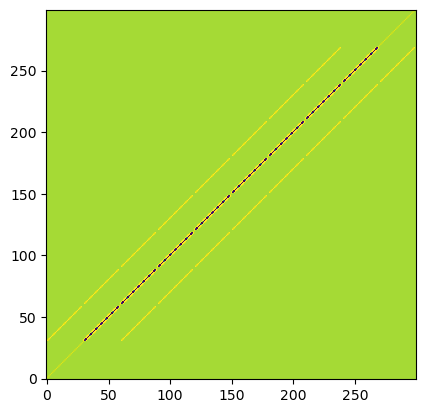

In [18]:
plt.imshow(A, vmin=-2/dy,vmax=1/dx,origin="lower")
plt.savefig("A_60_40.png")

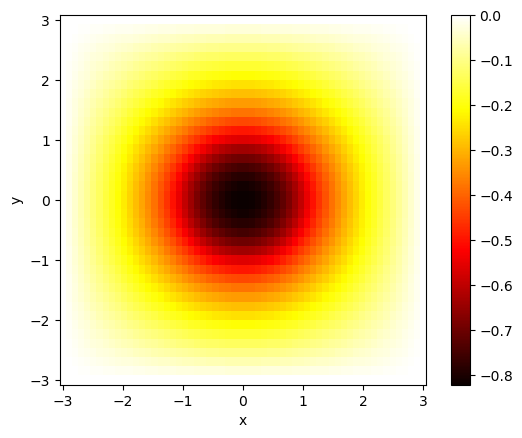

In [30]:
lu, piv = lu_factor(A)
Phi = lu_solve((lu, piv), rhs)

Phi = Phi.reshape((nx, ny))
# Plot
fig,ax = plt.subplots()
im = ax.pcolormesh(x2d,y2d,Phi,rasterized=True,cmap='hot')
plt.colorbar(im)
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("pot_60_40.png")
plt.show()

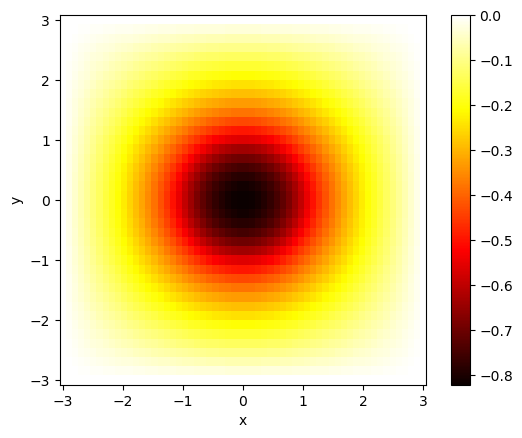

In [34]:
from scipy.sparse.linalg import bicgstab

iters = [1, 3, 10, 30, 100]

for it in iters:
    phi, exit_code = bicgstab(A, rhs, maxiter=it)
    Phi = phi.reshape((nx, ny))
    fig,ax = plt.subplots()
    im = ax.pcolormesh(x2d,y2d,Phi,rasterized=True,cmap='hot')
    plt.colorbar(im)
    ax.set_aspect('equal')
    plt.xlabel('x')
    plt.ylabel('y')
plt.savefig()
plt.show()